In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
library(tidyverse) # metapackage of all tidyverse packages
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "cyclistic-bike-share"               "cyclistic-bike-trip"               
[3] "divvy-bike-share-chicago-2021-july"

In [2]:
m1_202107 <- read_csv("../input/divvy-bike-share-chicago-2021-july/202107-divvy-tripdata.csv")
m2_202106 <- read_csv("../input/cyclistic-bike-trip/2021_jun.csv")
m3_202105 <- read_csv("../input/cyclistic-bike-trip/2021_may.csv")
m4_202104 <- read_csv("../input/cyclistic-bike-share/202104-divvy-tripdata.csv")
m5_202103 <- read_csv("../input/cyclistic-bike-share/202103-divvy-tripdata.csv")
m6_202102 <- read_csv("../input/cyclistic-bike-share/202102-divvy-tripdata.csv")
m7_202101 <- read_csv("../input/cyclistic-bike-share/202101-divvy-tripdata.csv")
m8_202012 <- read_csv("../input/cyclistic-bike-share/202012-divvy-tripdata.csv")
m9_202011 <- read_csv("../input/cyclistic-bike-share/202011-divvy-tripdata.csv")
m10_202010 <- read_csv("../input/cyclistic-bike-share/202010-divvy-tripdata.csv")
m11_202009 <- read_csv("../input/cyclistic-bike-share/202009-divvy-tripdata.csv")
m12_202008 <- read_csv("../input/cyclistic-bike-share/202008-divvy-tripdata.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),


# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [3]:
# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(	m1_202107	)
colnames(	m2_202106	)
colnames(	m3_202105	)
colnames(	m4_202104	)
colnames(	m5_202103	)
colnames(	m6_202102	)
colnames(	m7_202101	)
colnames(	m8_202012	)
colnames(	m9_202011	)
colnames(	m10_202010	)
colnames(	m11_202009	)
colnames(	m12_202008	)

# Inspect the dataframes and look for incongruencies
str(	m1_202107	)
str(	m2_202106	)
str(	m3_202105	)
str(	m4_202104	)
str(	m5_202103	)
str(	m6_202102	)
str(	m7_202101	)
str(	m8_202012	)
str(	m9_202011	) #change format of start and end station id to character
str(	m10_202010	) #change fomat of start and end station id to character
str(	m11_202009	) #change fomat of start and end station id to character
str(	m12_202008	) #change fomat of start and end station id to character

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

spec_tbl_df [822,410 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:822410] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:822410] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:822410], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:822410], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:822410] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:822410] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:822410] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:822410] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ start_lat         : num [1:822410] 41.9 41.9 41.9 41.

# Convert Format so that they can stack correctly
change format of start and end station id to character

In [9]:
m9_202011 <- mutate(	m9_202011,start_station_id = as.character(start_station_id),end_station_id = as.character(end_station_id))
m10_202010	<-	mutate(m10_202010,start_station_id=as.character(start_station_id),end_station_id=as.character(end_station_id))
m11_202009	<-	mutate(	m11_202009,start_station_id=as.character(start_station_id),end_station_id=as.character(end_station_id))
m12_202008	<-	mutate(	m12_202008,start_station_id=as.character(start_station_id),end_station_id=as.character(end_station_id))


# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(
m1_202107	,
m2_202106	,
m3_202105	,
m4_202104	,
m5_202103	,
m6_202102	,
m7_202101	,
m8_202012	,
m9_202011	,
m10_202010	,
m11_202009	,
m12_202008	
)

head(all_trips)
str(all_trips)
nrow(all_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual


spec_tbl_df [4,731,081 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4731081] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:4731081] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4731081], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:4731081], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:4731081] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:4731081] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:4731081] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:4731081] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ start_lat         : num [1:4731081] 41.9 41

[1] 4731081

In [5]:
# Remove lat, long, fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [6]:
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics


[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "start_station_id"  
[7] "end_station_name"   "end_station_id"     "member_casual"

[1] 4731081

[1] 4731081       9

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,casual
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,casual
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,member
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,member
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,casual
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,casual


tibble [4,731,081 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4731081] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:4731081] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4731081], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:4731081], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:4731081] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:4731081] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:4731081] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:4731081] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ member_casual     : chr [1:4731081] "casual" "casual" "member

   ride_id          rideable_type        started_at                 
 Length:4731081     Length:4731081     Min.   :2020-08-01 00:00:01  
 Class :character   Class :character   1st Qu.:2020-10-03 08:51:57  
 Mode  :character   Mode  :character   Median :2021-04-05 13:41:29  
                                       Mean   :2021-02-17 10:22:09  
                                       3rd Qu.:2021-06-15 05:47:53  
                                       Max.   :2021-07-31 23:59:58  
    ended_at                   start_station_name start_station_id  
 Min.   :2020-08-01 00:04:41   Length:4731081     Length:4731081    
 1st Qu.:2020-10-03 09:13:58   Class :character   Class :character  
 Median :2021-04-05 14:03:51   Mode  :character   Mode  :character  
 Mean   :2021-02-17 10:44:21                                        
 3rd Qu.:2021-06-15 06:16:14                                        
 Max.   :2021-08-12 17:45:41                                        
 end_station_name   end_station_id

In [7]:
# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)


 casual  member 
2102079 2629002 

There are a few problems we will need to fix:
(1) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
(2) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.
(3) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

In [13]:
#1
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
# https://www.statmethods.net/input/dates.html more on date formats in R found at that link
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- as.double(difftime(all_trips$ended_at,all_trips$started_at,
                                   units = "mins"))


# Inspect the structure of the columns
str(all_trips)

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)


spec_tbl_df [4,731,081 × 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4731081] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:4731081] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4731081], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:4731081], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:4731081] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:4731081] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:4731081] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:4731081] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ start_lat         : num [1:4731081] 41.9 41

[1] FALSE

[1] TRUE

In [14]:
nrow(subset(all_trips,ride_length <= 0))

all_trips <- all_trips[!(all_trips$ride_length <= 0),]

# Lets recheck once again
nrow(subset(all_trips,ride_length <= 0))

[1] 8619

[1] 0

# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

Let us now check the total number of rides by rider type. Also, this will make sure that the rider type has only two distinct value.

In [16]:
all_trips %>% group_by(member_casual) %>% count(member_casual)

member_casual,n
<chr>,<int>
casual,2099442
member,2623020


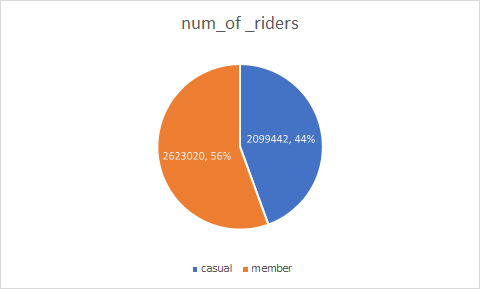

44% o the riders are casual riders, 56% of them are annual members.

Lets us now check the total trip duration(mins) by rider_type

In [17]:
all_trips %>% group_by(member_casual) %>% summarize(total_trip_duration = sum(ride_length))

member_casual,total_trip_duration
<chr>,<dbl>
casual,77181212
member,38655745


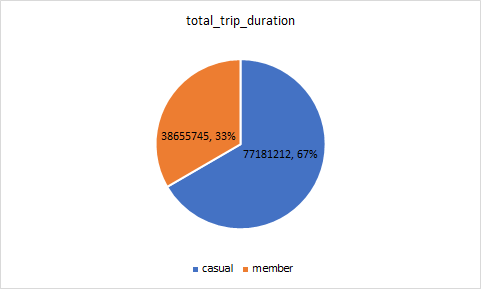

67% of rides are taken by casual members, 33% of the rides are taken by annual members

summarize based on member type

In [18]:
all_trips %>% summarise(min_trip_duration=min(all_trips$ride_length),
                                                   max_trip_duration=max(all_trips$ride_length),
                                                   average_trip_duration=(mean(all_trips$ride_length)))

all_trips_v2 <- all_trips

min_trip_duration,max_trip_duration,average_trip_duration
<dbl>,<dbl>,<dbl>
0.01666667,55944.15,24.52893


In [36]:
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips$ride_length) #straight average (total ride length / rides)
median(all_trips$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips$ride_length) #longest ride
min(all_trips$ride_length) #shortest ride

# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips$ride_length)

# Compare members and casual users
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = mean)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = median)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = max)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)


[1] 24.52893

[1] 13.2

[1] 55944.15

[1] 0.01666667

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     7.35    13.20    24.53    24.12 55944.15 

all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,36.76273
member,14.73711


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,18.0
member,10.5


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,55944.15
member,33421.37


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,0.01666667
member,0.01666667


all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<chr>,<dbl>
casual,Friday,34.85937
member,Friday,14.47307
casual,Monday,36.19306
member,Monday,14.27652
casual,Saturday,39.62124
member,Saturday,16.22152
casual,Sunday,42.56039
member,Sunday,16.76377
casual,Thursday,32.12703


all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,42.56039
member,Sunday,16.76377
casual,Monday,36.19306
member,Monday,14.27652
casual,Tuesday,32.66356
member,Tuesday,13.88980
casual,Wednesday,32.54648
member,Wednesday,14.01149
casual,Thursday,32.12703


In [37]:
# analyze ridership data by type and weekday
all_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
  ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,392472,42.56039
casual,Mon,229626,36.19306
casual,Tue,223135,32.66356
casual,Wed,231184,32.54648
casual,Thu,231877,32.12703
casual,Fri,302783,34.85937
casual,Sat,488365,39.62124
member,Sun,330101,16.76377
member,Mon,348733,14.27652


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



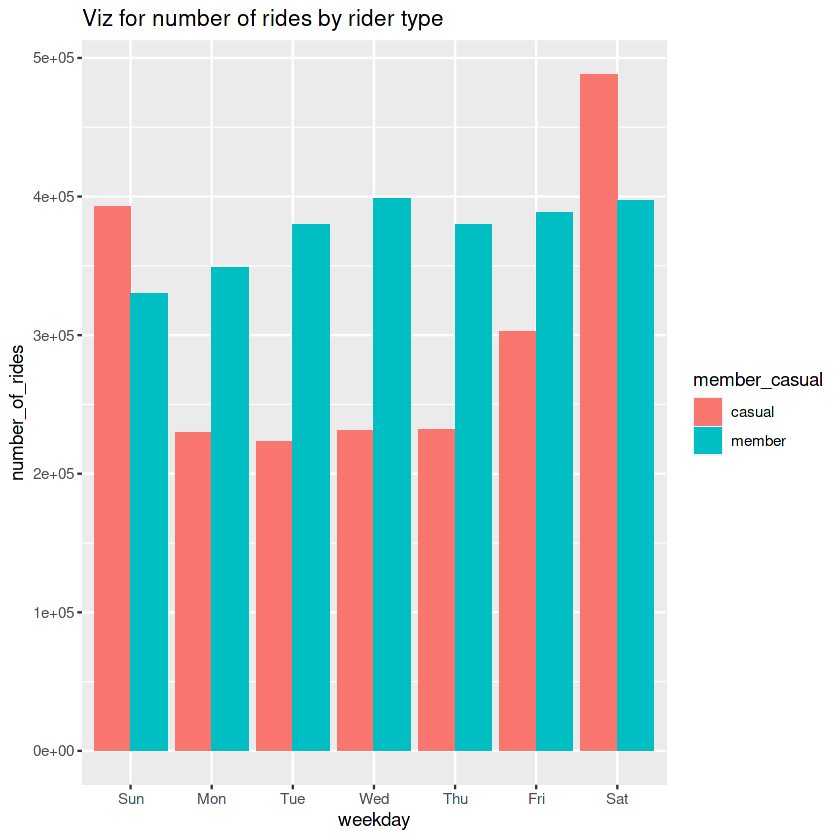

In [38]:
# Let's visualize the number of rides by rider type
all_trips%>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title = "Viz for number of rides by rider type")

Number of rides taken by casual and annual members are high at saturday.

During weekends (Saturday and Sunday) the casual member rides are max than annual members.

During weekday(Mon-Fri) annual members riders are higher than casual.


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



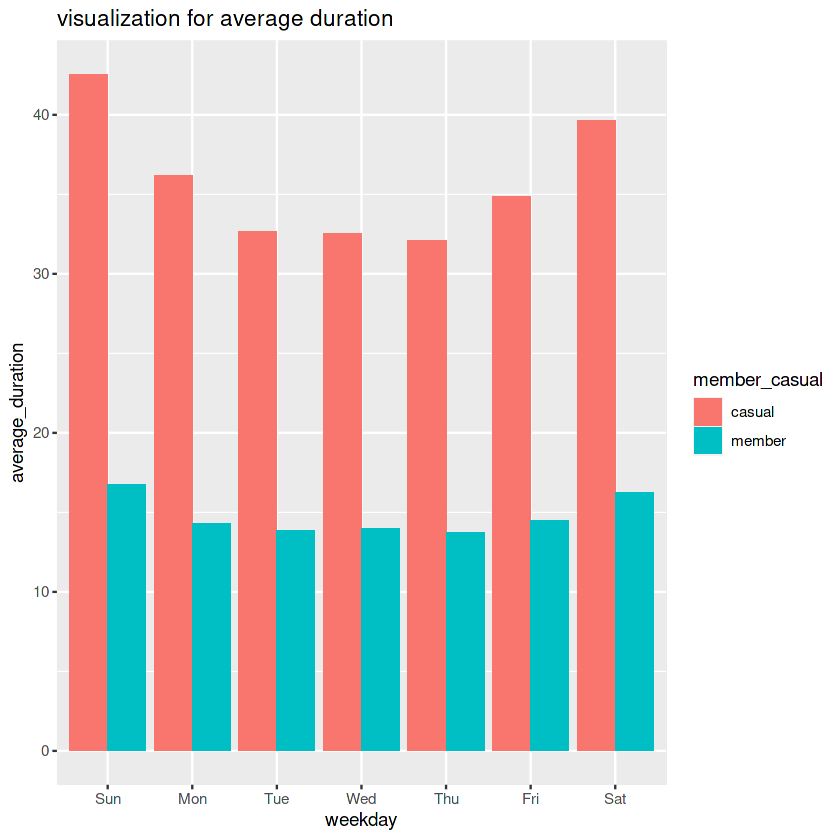

In [39]:
# Let's create a visualization for average duration
all_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+ labs(title = "visualization for average duration")

Ride length of casual members is way higher(almost double) the duration of annual members.

Lets check total no. of trips vs rider_type & bike_type



In [45]:
all_trips%>%
  group_by(member_casual, rideable_type) %>%
  summarise(total_rides = n())  %>%
  arrange(desc(total_rides))


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,rideable_type,total_rides
<chr>,<chr>,<int>
member,classic_bike,1090180
member,docked_bike,792294
casual,docked_bike,757973
member,electric_bike,740546
casual,classic_bike,695197
casual,electric_bike,646272


Annual members are using classic bike the most followed by docked_bike.
Casual members are using docked_bike the most followed by classic bike.
Both casual and annual members using electric_bike the least.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



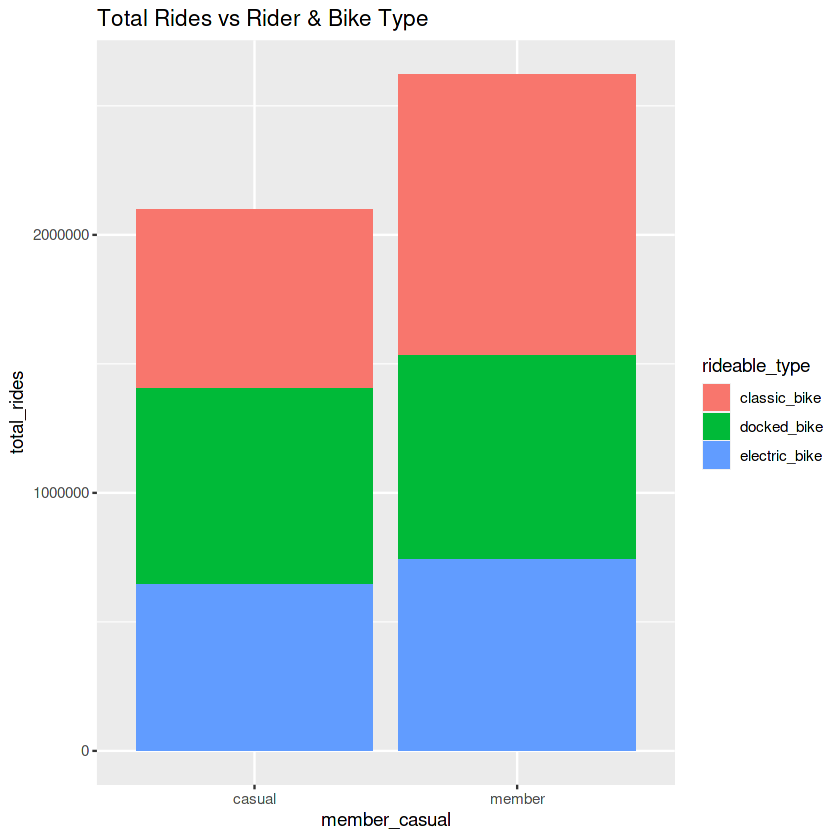

In [44]:
all_trips%>%
  group_by(member_casual, rideable_type) %>%
  summarise(total_rides = n()) %>%
  ggplot(aes(x = member_casual, y = total_rides, fill = rideable_type)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(title = "Total Rides vs Rider & Bike Type")

From the above graph, what is noticable is that docked bikes are in most demand and equally used by both member riders as well as casual riders. However, the ratio of bike type to the rider type appears to be almost same.


Let us now check total_rides by rider_type vs month_year

In [55]:
names(all_trips)
# Coloumn for month and year the trip started
all_trips$month_year <- format(as.Date(all_trips$date), "%b_%y")

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "ride_length"        "month_year"

In [56]:
names(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "ride_length"        "month_year"

In [69]:
all_trips %>%
  group_by(member_casual, month_year) %>%
  summarise(total_rides = n()) %>%
  arrange(member_casual, desc(total_rides),month_year)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,month_year,total_rides
<chr>,<chr>,<int>
casual,Jul_21,442011
casual,Jun_21,370636
casual,Aug_20,288586
casual,May_21,256888
casual,Sep_20,230049
casual,Oct_20,144511
casual,Apr_21,136590
casual,Nov_20,87902
casual,Mar_21,84028


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



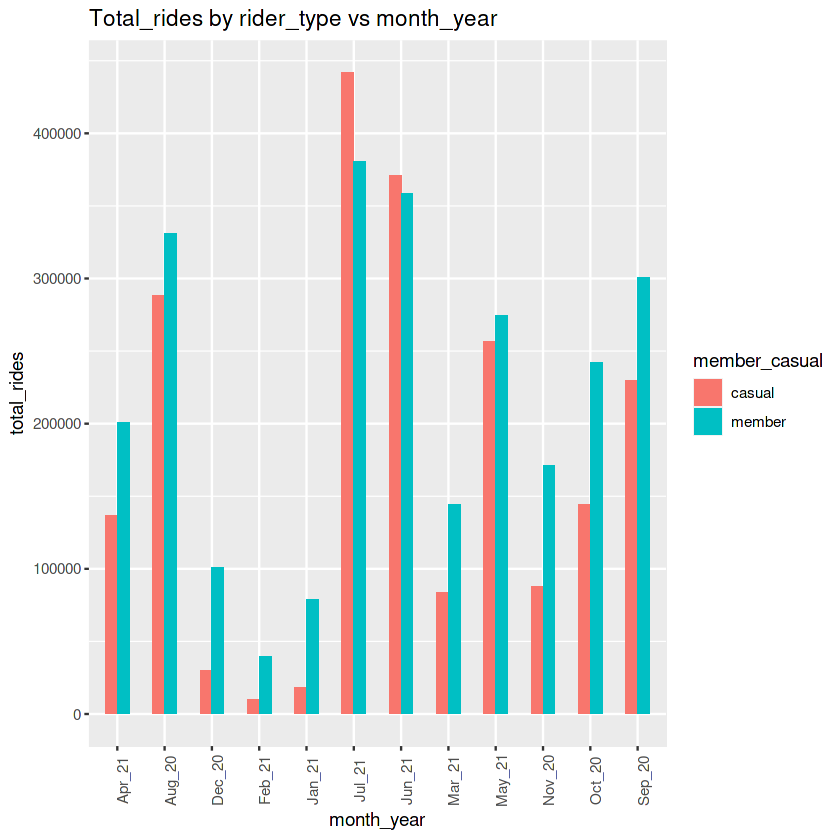

In [63]:
#viz
all_trips %>% arrange(month_year)%>%
  group_by(member_casual, month_year) %>%
  summarise(total_rides = n()) %>%
  ggplot(mapping = aes(x = month_year, y = total_rides, fill = member_casual)) + 
  labs(title = "Total_rides by rider_type vs month_year") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  theme(axis.text.x = element_text(angle = 90)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

July 2021 month has the most rides.

casual members has made the most rides in July month of 2021.

annual members has made the most rides in July month of 2021.

May,june,july has highest numbers of rides in the year 2021.

Dec 2020 - Feb 2021 has the lowest number of riders this could be due to pandemic and other external factors (eg. cold weather, major quality issue) that might have hindered with customer needs.


However, the number of trips made by members is always higher than the casual riders across all months of the year except July 21 & June 21.